In [2]:
import numpy as np
import pandas as pd
import configparser
config = configparser.ConfigParser()

In [4]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [6]:
config.read("../../env.ini")
data_home = config['DEFAULT']['data_home']
local_lib = config['DEFAULT']['local_lib']

In [8]:
data_directory = f"{data_home}/woolf"

## Sentiment Analysis

Using the nrc lexicon

In [12]:
salex_csv = f'{data_directory}/salex_nrc.csv'
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [14]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [16]:
SALEX

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


In [18]:
emo_cols

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'sentiment']

In [20]:
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
BOOKS = OHCO[:1]
CHAPS = OHCO[:2]
PARAS = OHCO[:3]
SENTS = OHCO[:4]

LIB = pd.read_csv('woolf-LIB.csv').set_index('book_id')
VOCAB = pd.read_csv('woolf-VOCAB.csv').set_index('term_str').sort_index()
BOW = pd.read_csv('woolf-BOW-CHAPS.csv').set_index(['book_id','chap_num','term_str']).sort_index()

In [22]:
VOCAB_SENT = VOCAB.join(SALEX, how='inner')

In [24]:
VOCAB_SENT.head()

,n,n_chars,p,i,stop,stem_porter,max_pos,max_pos_group,n_pos_group,cat_pos_group,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,,,,,,,,,,,
abandoned,1,9,0.000002,18.705025,0,abandon,VBD,VB,1,{'VB'},...,0,0,1,0,1,0,1,0,0,-1
abandonment,7,11,0.000016,15.897670,0,abandon,NN,NN,2,"{'NN', 'JJ'}",...,0,0,1,0,1,0,1,1,0,-1
abhor,1,5,0.000002,18.705025,0,abhor,VBP,VB,1,{'VB'},...,0,1,1,0,1,0,0,0,0,-1
abnormal,1,8,0.000002,18.705025,0,abnorm,JJ,JJ,1,{'JJ'},...,0,1,0,0,1,0,0,0,0,-1
abolish,2,7,0.000005,17.705025,0,abolish,VB,VB,1,{'VB'},...,0,0,0,0,1,0,0,0,0,-1


In [26]:
BOW_SENT = BOW.join(VOCAB_SENT[['max_pos'] + emo_cols], on='term_str', rsuffix='_v', how='inner') #.dropna()

In [28]:
BOW_SENT

n        tf     tfidf max_pos  anger  \
book_id chap_num term_str                                            
1       1        absent       1  0.003311  0.006343      JJ      0   
        10       absent       2  0.006897  0.013211      JJ      0   
        11       absent       1  0.004695  0.008993      JJ      0   
        14       absent       1  0.003333  0.006385      JJ      0   
        15       absent       1  0.003876  0.007425      JJ      0   
...                          ..       ...       ...     ...    ...   
4       8        sinner       1  0.002410  0.015362      NN      1   
                 sprite       1  0.002410  0.015362      NN      0   
                 suffocation  1  0.002410  0.015362      NN      1   
                 tax          1  0.002410  0.015362      NN      0   
                 wickedness   1  0.002410  0.015362      NN      0   

                              anticipation  disgust  fear  joy  sadness  \
book_id chap_num term_str                                                 
1       1        absent                  0        0     0    0        1   
        10       absent                  0        0     0    0        1   
        11       absent                  0        0     0    0        1   
        14       absent                  0        0     0    0        1   
        15       absent                  0        0     0    0        1   
...                                    ...      ...   ...  ...      ...   
4       8        sinner                  0        1     1    0        1   
                 sprite                  0        0     1    0        0   
                 suffocation             0        0     1    0        0   
                 tax                     0        0     0    0        1   
                 wickedness              0        1     0    0        0   

                              surprise  trust  sentiment  
book_id chap_num term_str                                 
1       1        absent              0      0         -1  
        10       absent              0      0         -1  
        11       absent              0      0         -1  
        14       absent              0      0         -1  
        15       absent              0      0         -1  
...                                ...    ...        ...  
4       8        sinner              0      0         -1  
                 sprite              0      0         -1  
                 suffocation         0      0         -1  
                 tax                 0      0         -1  
                 wickedness          0      0         -1  

[13856 rows x 13 columns]

In [30]:
# Weight emotions by tfidf

#for col in emo_cols:
    #BOW_SENT[col] = BOW_SENT[col] * BOW_SENT.tfidf

In [32]:
# DOC_SENT

# Using chapter as bag

# Multiply sentiment scores by token count
for col in emo_cols:
    BOW_SENT[col + '_weighted'] = BOW_SENT[col] * BOW_SENT['n']

# Aggregate weighted sentiment by chapter
DOC_SENT = BOW_SENT.groupby(CHAPS)[[col + '_weighted' for col in emo_cols]].sum()

# Optionally normalize by total tokens per chapter
tokens_per_chap = BOW.groupby(CHAPS)['n'].sum()
DOC_SENT = DOC_SENT.div(tokens_per_chap, axis=0)

In [34]:
DOC_SENT

anger_weighted  anticipation_weighted  disgust_weighted  \
book_id chap_num                                                            
1       1               0.011923               0.012112          0.007949   
        2               0.010581               0.014108          0.009096   
        3               0.008581               0.011977          0.010547   
        4               0.009774               0.015261          0.008745   
        5               0.012448               0.012102          0.010719   
...                          ...                    ...               ...   
4       4               0.008119               0.019767          0.007060   
        5               0.014173               0.015748          0.006299   
        6               0.014252               0.011401          0.010926   
        7               0.012346               0.018101          0.009811   
        8               0.010404               0.018034          0.008819   

                  fear_weighted  joy_weighted  sadness_weighted  \
book_id chap_num                                                  
1       1              0.015329      0.015897          0.016843   
        2              0.011324      0.022090          0.013366   
        3              0.012156      0.015731          0.014659   
        4              0.011831      0.018861          0.013032   
        5              0.015906      0.018326          0.013831   
...                         ...           ...               ...   
4       4              0.010589      0.026827          0.012354   
        5              0.022047      0.025197          0.018898   
        6              0.015677      0.018527          0.018527   
        7              0.015030      0.022097          0.015328   
        8              0.013377      0.024277          0.013476   

                  surprise_weighted  trust_weighted  sentiment_weighted  
book_id chap_num                                                         
1       1                  0.006813        0.016276           -0.001703  
        2                  0.009467        0.019120            0.009282  
        3                  0.008223        0.020915            0.002860  
        4                  0.007202        0.019204            0.007202  
        5                  0.009682        0.016598            0.000000  
...                             ...             ...                 ...  
4       4                  0.009884        0.019414            0.014119  
        5                  0.007874        0.023622            0.001575  
        6                  0.008076        0.020428            0.005701  
        7                  0.008469        0.022395            0.006411  
        8                  0.011098        0.023979            0.013476  

[83 rows x 9 columns]

In [36]:
CHAPS

['book_id', 'chap_num']

In [38]:
DOC_SENT = DOC_SENT.join(LIB[['date','raw_title','prot_sex']], on='book_id')

In [40]:
DOC_SENT

anger_weighted  anticipation_weighted  disgust_weighted  \
book_id chap_num                                                            
1       1               0.011923               0.012112          0.007949   
        2               0.010581               0.014108          0.009096   
        3               0.008581               0.011977          0.010547   
        4               0.009774               0.015261          0.008745   
        5               0.012448               0.012102          0.010719   
...                          ...                    ...               ...   
4       4               0.008119               0.019767          0.007060   
        5               0.014173               0.015748          0.006299   
        6               0.014252               0.011401          0.010926   
        7               0.012346               0.018101          0.009811   
        8               0.010404               0.018034          0.008819   

                  fear_weighted  joy_weighted  sadness_weighted  \
book_id chap_num                                                  
1       1              0.015329      0.015897          0.016843   
        2              0.011324      0.022090          0.013366   
        3              0.012156      0.015731          0.014659   
        4              0.011831      0.018861          0.013032   
        5              0.015906      0.018326          0.013831   
...                         ...           ...               ...   
4       4              0.010589      0.026827          0.012354   
        5              0.022047      0.025197          0.018898   
        6              0.015677      0.018527          0.018527   
        7              0.015030      0.022097          0.015328   
        8              0.013377      0.024277          0.013476   

                  surprise_weighted  trust_weighted  sentiment_weighted  date  \
book_id chap_num                                                                
1       1                  0.006813        0.016276           -0.001703  1915   
        2                  0.009467        0.019120            0.009282  1915   
        3                  0.008223        0.020915            0.002860  1915   
        4                  0.007202        0.019204            0.007202  1915   
        5                  0.009682        0.016598            0.000000  1915   
...                             ...             ...                 ...   ...   
4       4                  0.009884        0.019414            0.014119  1925   
        5                  0.007874        0.023622            0.001575  1925   
        6                  0.008076        0.020428            0.005701  1925   
        7                  0.008469        0.022395            0.006411  1925   
        8                  0.011098        0.023979            0.013476  1925   

                       raw_title prot_sex  
book_id chap_num                           
1       1         THE VOYAGE OUT        f  
        2         THE VOYAGE OUT        f  
        3         THE VOYAGE OUT        f  
        4         THE VOYAGE OUT        f  
        5         THE VOYAGE OUT        f  
...                          ...      ...  
4       4           MRS DALLOWAY        f  
        5           MRS DALLOWAY        f  
        6           MRS DALLOWAY        f  
        7           MRS DALLOWAY        f  
        8           MRS DALLOWAY        f  

[83 rows x 12 columns]

In [42]:
sentiment_over_time = DOC_SENT.groupby(['date']).mean()

/var/folders/13/9xyr4p8x2kq9msv1m8ysrjq00000gn/T/ipykernel_54138/1479249478.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sentiment_over_time = DOC_SENT.groupby(['date']).mean()


In [44]:
sentiment_over_time

,anger_weighted,anticipation_weighted,disgust_weighted,fear_weighted,joy_weighted,sadness_weighted,surprise_weighted,trust_weighted,sentiment_weighted
date,,,,,,,,,
1915,0.011131,0.014448,0.009053,0.012463,0.019808,0.013845,0.009441,0.019225,0.004687
1919,0.011592,0.015896,0.008053,0.013371,0.020400,0.014950,0.009635,0.021837,0.006850
1922,0.010536,0.015018,0.007677,0.011577,0.018003,0.014229,0.007861,0.019574,0.003362
1925,0.012143,0.015945,0.008918,0.014890,0.022940,0.015517,0.009275,0.020936,0.006788


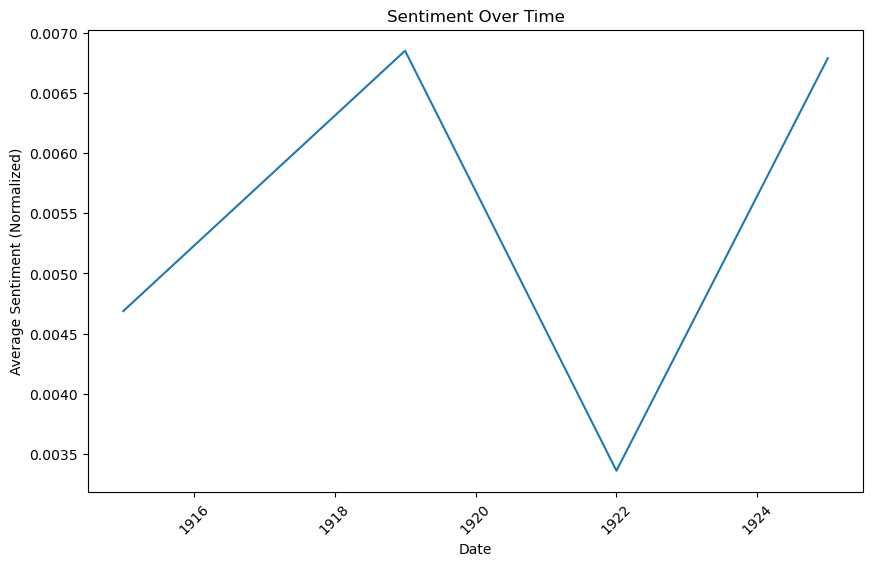

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x=sentiment_over_time.index, y=sentiment_over_time['sentiment_weighted'])
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment (Normalized)')
plt.xticks(rotation=45)
plt.savefig("sent_time.png", dpi=300)
plt.show()

## RIFF

/var/folders/13/9xyr4p8x2kq9msv1m8ysrjq00000gn/T/ipykernel_54138/3885192909.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sentiment_by_chapter = DOC_SENT.groupby(['book_id', 'chap_num']).mean()


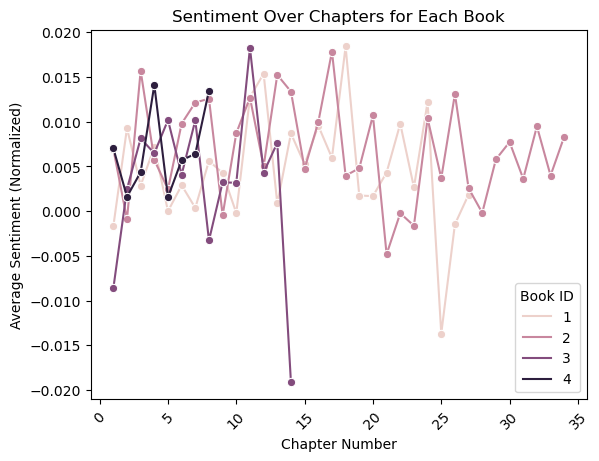

In [48]:
# Plotting over chapters

sentiment_by_chapter = DOC_SENT.groupby(['book_id', 'chap_num']).mean()
# Plotting sentiment over chapters for each book (faceted by book_id)
sns.lineplot(data=sentiment_by_chapter, x='chap_num', y='sentiment_weighted', hue='book_id', marker='o')

plt.title('Sentiment Over Chapters for Each Book')
plt.xlabel('Chapter Number')
plt.ylabel('Average Sentiment (Normalized)')
plt.legend(title='Book ID')
plt.xticks(rotation=45)
plt.savefig("sent_chap.png", dpi=300)
plt.show()

### SAVE TABLES TO FILES

In [50]:
VOCAB_SENT.to_csv('woolf-VOCAB_SENT.csv', index=True, header=True)

In [52]:
BOW_SENT.to_csv('woolf-BOW_SENT.csv', index=True, header=True)

In [54]:
DOC_SENT.to_csv('woolf-DOC_SENT.csv', index=True, header=True)

## RIFF

I may not use this one but am leaving in notebook

In [56]:
emo_cols = [
    'anger_weighted',
    'anticipation_weighted',
    'disgust_weighted',
    'fear_weighted',
    'joy_weighted',
    'sadness_weighted',
    'surprise_weighted',
    'trust_weighted',
    'sentiment_weighted'
]

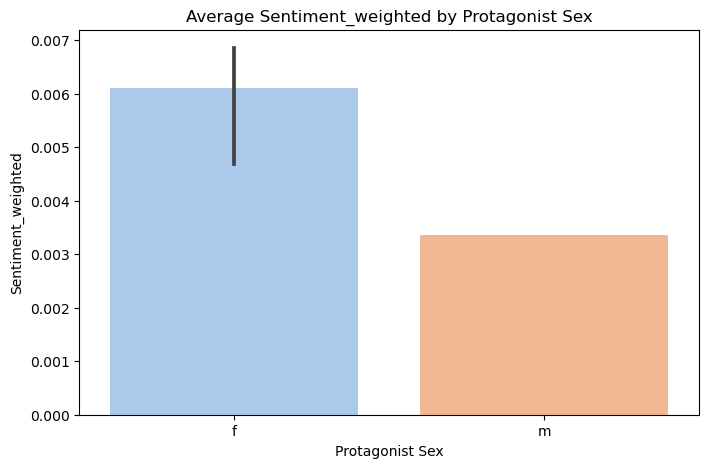

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

emo = 'sentiment_weighted'

# Add protagonist_sex to sentiment table
sent_with_meta = DOC_SENT.groupby('book_id')[emo_cols].mean().join(LIB[['prot_sex']])

plt.figure(figsize=(8, 5))
sns.barplot(x='prot_sex', y=emo, data=sent_with_meta, palette='pastel')
plt.title(f'Average {emo.capitalize()} by Protagonist Sex')
plt.ylabel(f'{emo.capitalize()}')
plt.xlabel('Protagonist Sex')
plt.savefig("sent_sex.png", dpi=300)
plt.show()